In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from sklearn import svm
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score , classification_report,f1_score
import scipy.stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot
import os
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_excel('Downloads/FinalCorneal.xlsx')

In [3]:
data

,DonorTrephineSize,Eye,KeratoplastyInFellowEyeAtGraftRejection,Age,Sex,VKC,type.of.transplant,SutureComplication,StitchAbscess,LooseSuture,...,FU,IntervalToFirstStutreRemoval,IntervalToCompleteSutureRemoval,IntervalToStopSteroid,TimeToFirstSutureRemoval,TimeToSecondRejection,TimeToThirdRejection,TimeToFourthRejection,TimeToFifthRejection,TimeToSixthRejection
0,8.00,1,1,26,1,1,1,2,2,2,...,9357,232.0,666.0,99.0,22.0,11.0,28.0,115.0,NaN,NaN
1,8.00,2,1,19,1,1,2,1,1,1,...,1783,233.0,233.0,157.0,32.0,11.0,3.0,17.0,18.0,NaN
2,8.25,1,1,39,1,1,2,2,1,1,...,1055,276.0,341.0,283.0,48.0,13.0,NaN,NaN,NaN,NaN
3,8.25,1,1,47,2,1,1,2,1,1,...,6505,380.0,380.0,94.0,44.0,19.0,23.0,29.0,35.0,40.0
4,8.25,2,1,30,1,1,2,2,2,1,...,988,833.0,858.0,121.0,119.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,8.00,2,1,30,2,1,2,2,1,1,...,579,216.0,308.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
1248,8.50,2,1,25,2,1,2,1,1,1,...,603,603.0,603.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN
1249,8.50,2,1,29,1,1,2,1,1,1,...,345,345.0,345.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN
1250,8.25,1,1,28,1,1,1,2,2,2,...,489,154.0,489.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['DonorTrephineSize', 'Eye', 'KeratoplastyInFellowEyeAtGraftRejection',
       'Age', 'Sex', 'VKC', 'type.of.transplant', 'SutureComplication',
       'StitchAbscess', 'LooseSuture', 'BrokenSuture', 'SutureVascularization',
       'SutureIn', 'OnSteroid', 'RecodedSecondaryIntervention',
       'GraftVascularization', 'VKCReactivation', 'GraftRejection',
       'SutureComplicationAssociatedWithRejection',
       'GraftVascularizationAssociateWithRejection',
       'SecondaryInterventionAssociatedWithRejection',
       'VKCReactivationAssociateWithGraftRejection',
       'GraftRejectionMoreThanOnce', 'FU', 'IntervalToFirstStutreRemoval',
       'IntervalToCompleteSutureRemoval', 'IntervalToStopSteroid',
       'TimeToFirstSutureRemoval', 'TimeToSecondRejection',
       'TimeToThirdRejection', 'TimeToFourthRejection', 'TimeToFifthRejection',
       'TimeToSixthRejection'],
      dtype='object')

In [5]:
imp = IterativeImputer(max_iter=10, random_state=0)


In [6]:
y = data['GraftRejection']
x  = data[data.columns[:-5]].drop(['TimeToFirstSutureRemoval',"GraftRejection",'GraftRejectionMoreThanOnce','KeratoplastyInFellowEyeAtGraftRejection','SutureComplicationAssociatedWithRejection','GraftVascularizationAssociateWithRejection','SecondaryInterventionAssociatedWithRejection','VKCReactivationAssociateWithGraftRejection'],axis =1)

In [7]:
x.drop('SutureIn',axis = 1,inplace = True)

In [8]:
x = imp.fit_transform(x)

In [9]:
x = pd.DataFrame(x)

In [10]:
x.columns = data[data.columns[:-5]].drop(['TimeToFirstSutureRemoval','SutureIn',"GraftRejection",'KeratoplastyInFellowEyeAtGraftRejection','SutureComplicationAssociatedWithRejection','GraftRejectionMoreThanOnce','GraftVascularizationAssociateWithRejection','SecondaryInterventionAssociatedWithRejection','VKCReactivationAssociateWithGraftRejection'],axis =1).columns

In [11]:
y = y-1

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=123)
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

In [13]:
x_train.shape


(876, 20)

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu',input_dim = 20),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
sgd = tf.keras.optimizers.SGD(lr = 0.03 , decay =1e-6 , momentum = 0.9 , nesterov = True)
model.compile(loss = 'binary_crossentropy' , optimizer = sgd,metrics = tf.keras.metrics.AUC())

c:\Users\siava\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [61]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=50)

Epoch 1/50
28/28 [==============================] - 1s 18ms/step - loss: 0.6755 - auc_2: 0.4678 - val_loss: 0.6344 - val_auc_2: 0.4668
Epoch 2/50
28/28 [==============================] - 0s 9ms/step - loss: 0.5697 - auc_2: 0.5437 - val_loss: 0.6310 - val_auc_2: 0.6644
Epoch 3/50
28/28 [==============================] - 0s 8ms/step - loss: 0.5706 - auc_2: 0.5727 - val_loss: 0.6335 - val_auc_2: 0.7165
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 0.5548 - auc_2: 0.6029 - val_loss: 0.6164 - val_auc_2: 0.7675
Epoch 5/50
28/28 [==============================] - 0s 8ms/step - loss: 0.5510 - auc_2: 0.5911 - val_loss: 0.6048 - val_auc_2: 0.7884
Epoch 6/50
28/28 [==============================] - 0s 9ms/step - loss: 0.5480 - auc_2: 0.6017 - val_loss: 0.5915 - val_auc_2: 0.7998
Epoch 7/50
28/28 [==============================] - 0s 8ms/step - loss: 0.5316 - auc_2: 0.6455 - val_loss: 0.5855 - val_auc_2: 0.7973
Epoch 8/50
28/28 [==============================] - 0s 8ms/st

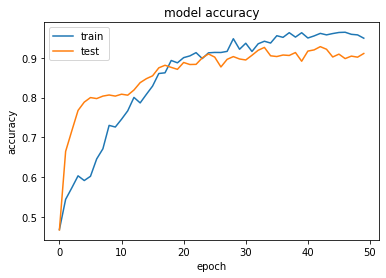

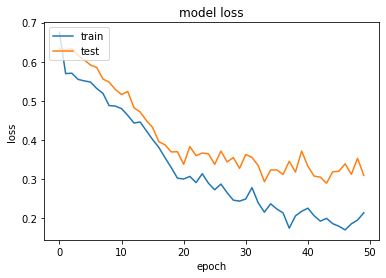

In [62]:
plt.plot(history.history['auc_2'])
plt.plot(history.history['val_auc_2'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
pred = (model.predict(x_test)>0.5)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       254
           1       0.98      0.67      0.80       122

    accuracy                           0.89       376
   macro avg       0.92      0.83      0.86       376
weighted avg       0.90      0.89      0.88       376



In [14]:
rf = RandomForestClassifier(oob_score = True , criterion = 'gini',max_depth=13)
rf.fit(x_train,y_train)
rf_pred_prob = rf.predict_proba(x_test)
rf_pred = rf.predict(x_test)
rf_pred_prob = 1- rf_pred_prob.reshape(752,1)[::2]
metrics.confusion_matrix(y_test,rf_pred)

array([[234,  20],
       [ 73,  49]], dtype=int64)

Index(['DonorTrephineSize', 'Eye', 'KeratoplastyInFellowEyeAtGraftRejection',
       'Age', 'Sex', 'VKC', 'type.of.transplant', 'SutureComplication',
       'StitchAbscess', 'LooseSuture', 'BrokenSuture', 'SutureVascularization',
       'SutureIn', 'OnSteroid', 'RecodedSecondaryIntervention',
       'GraftVascularization', 'VKCReactivation', 'GraftRejection',
       'SutureComplicationAssociatedWithRejection',
       'GraftVascularizationAssociateWithRejection',
       'SecondaryInterventionAssociatedWithRejection',
       'VKCReactivationAssociateWithGraftRejection',
       'GraftRejectionMoreThanOnce', 'FU', 'IntervalToFirstStutreRemoval',
       'IntervalToCompleteSutureRemoval', 'IntervalToStopSteroid',
       'TimeToFirstSutureRemoval', 'TimeToSecondRejection',
       'TimeToThirdRejection', 'TimeToFourthRejection', 'TimeToFifthRejection',
       'TimeToSixthRejection'],
      dtype='object')


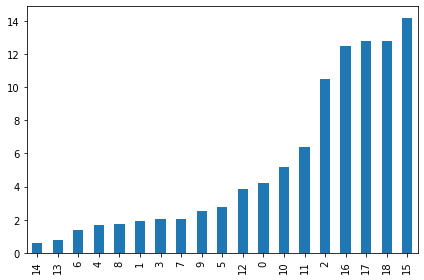

In [15]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances)
forest_importances= forest_importances.sort_values(axis=0)*100
fig,ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()
print(data.columns)

# feature selection

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [17]:
features = data[data.columns[:-5]].drop(['TimeToFirstSutureRemoval',"GraftRejection",'SutureIn','GraftRejectionMoreThanOnce','KeratoplastyInFellowEyeAtGraftRejection','SutureComplicationAssociatedWithRejection','GraftVascularizationAssociateWithRejection','SecondaryInterventionAssociatedWithRejection','VKCReactivationAssociateWithGraftRejection'],axis =1).columns

In [18]:
features


Index(['DonorTrephineSize', 'Eye', 'Age', 'Sex', 'VKC', 'type.of.transplant',
       'SutureComplication', 'StitchAbscess', 'LooseSuture', 'BrokenSuture',
       'SutureVascularization', 'OnSteroid', 'RecodedSecondaryIntervention',
       'GraftVascularization', 'VKCReactivation', 'FU',
       'IntervalToFirstStutreRemoval', 'IntervalToCompleteSutureRemoval',
       'IntervalToStopSteroid'],
      dtype='object')

In [19]:
pipeline = Pipeline([
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,1,0.02)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] model__alpha=0.01 ...............................................
[CV] .................. model__alpha=0.01, score=-0.168, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] .................. model__alpha=0.01, score=-0.150, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] .................. model__alpha=0.01, score=-0.146, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] .................. model__alpha=0.01, score=-0.162, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] .................. model__alpha=0.01, score=-0.156, total=   0.0s
[CV] model__alpha=0.03 ...............................................
[CV] .................. model__alpha=0.03, score=-0.177, total=   0.0s
[CV] model__alpha=0.03 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] model__alpha=0.18999999999999997 ................................
[CV] ... model__alpha=0.18999999999999997, score=-0.208, total=   0.0s
[CV] model__alpha=0.20999999999999996 ................................
[CV] ... model__alpha=0.20999999999999996, score=-0.214, total=   0.0s
[CV] model__alpha=0.20999999999999996 ................................
[CV] ... model__alpha=0.20999999999999996, score=-0.167, total=   0.0s
[CV] model__alpha=0.20999999999999996 ................................
[CV] ... model__alpha=0.20999999999999996, score=-0.175, total=   0.0s
[CV] model__alpha=0.20999999999999996 ................................
[CV] ... model__alpha=0.20999999999999996, score=-0.194, total=   0.0s
[CV] model__alpha=0.20999999999999996 ................................
[CV] ... model__alpha=0.20999999999999996, score=-0.208, total=   0.0s
[CV] model__alpha=0.22999999999999998 ................................
[CV] ... model__alpha=0.22999999999999998, score=-0.214, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])},
             scoring='neg_mean_squared_error', verbose=3)

In [20]:
search.best_params_


{'model__alpha': 0.01}

In [21]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [22]:
coefficients

array([ 0.        , -0.        ,  0.02278883,  0.00069332, -0.00237831,
       -0.03613223,  0.        ,  0.02577339, -0.00838241, -0.04174739,
        0.08054293,  0.09761002, -0.06680878,  0.02249364, -0.        ,
        0.05275187, -0.00849602, -0.        , -0.00795821])

In [23]:
importance = (coefficients)

In [24]:
importance

array([ 0.        , -0.        ,  0.02278883,  0.00069332, -0.00237831,
       -0.03613223,  0.        ,  0.02577339, -0.00838241, -0.04174739,
        0.08054293,  0.09761002, -0.06680878,  0.02249364, -0.        ,
        0.05275187, -0.00849602, -0.        , -0.00795821])

In [25]:
feature_selection = pd.Series(data = importance , index = np.array(features)).sort_values()

In [26]:
feature_selection

RecodedSecondaryIntervention      -0.066809
BrokenSuture                      -0.041747
type.of.transplant                -0.036132
IntervalToFirstStutreRemoval      -0.008496
LooseSuture                       -0.008382
IntervalToStopSteroid             -0.007958
VKC                               -0.002378
SutureComplication                 0.000000
IntervalToCompleteSutureRemoval   -0.000000
VKCReactivation                   -0.000000
Eye                               -0.000000
DonorTrephineSize                  0.000000
Sex                                0.000693
GraftVascularization               0.022494
Age                                0.022789
StitchAbscess                      0.025773
FU                                 0.052752
SutureVascularization              0.080543
OnSteroid                          0.097610
dtype: float64

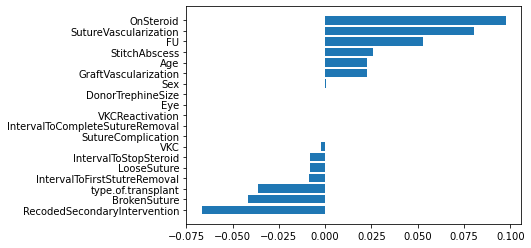

In [27]:
plt.barh(np.arange(len(feature_selection.index)),feature_selection.values , tick_label =feature_selection.index )
plt.savefig('Downloads/feature_selection_corneal.pdf')